In [9]:
import tensorflow as tf
import librosa
import pandas as pd
import numpy as np
import sklearn
import os
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from warnings import filterwarnings
filterwarnings("ignore")

In [10]:
def eventroll_to_multihot_vector(eventroll):
  active_events = (eventroll.sum(axis=1) >= 0.5).astype('float')
  multi_hot = np.delete(active_events, 8)
  return multi_hot

In [3]:
path = "C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\Y"
os.chdir(path)
Y_list = os.listdir()
print(len(Y_list))

10000


In [4]:
Y_hot = []
for i in range(len(Y_list)):
  Y_mat = np.load(Y_list[i])
  multi_hot = eventroll_to_multihot_vector(Y_mat)
  Y_hot.append(multi_hot)
print(len(Y_hot))

10000


In [5]:
path = "C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\X"
os.chdir(path)
X_list = os.listdir()
print(len(X_list))

10000


In [6]:
X_input = []
for i in range(len(X_list)):
  X_mat = np.load(X_list[i])
  a, b, c = X_mat.shape
  X_mat = librosa.power_to_db(X_mat, ref = np.max)
  X_mat = X_mat.reshape((b, c, 1))
  X_input.append(X_mat)
  X_input[i] = tf.convert_to_tensor(X_input[i])
print(len(X_input))

10000


In [7]:
path = 'C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\dataset\\Y'
os.chdir(path)
Yval_list = os.listdir()
print(len(Yval_list))

2000


In [8]:
Yval_hot = []
for i in range(len(Yval_list)):
  Y_mat = np.load(Yval_list[i])
  multi_hot = eventroll_to_multihot_vector(Y_mat)
  Yval_hot.append(multi_hot)
print(len(Yval_hot))

2000


In [9]:
path = 'C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\dataset\\X'
os.chdir(path)
Xval_list = os.listdir()
print(len(Xval_list))

2000


In [10]:
Xval_input = []
for i in range(len(Xval_list)):
  X_mat = np.load(Xval_list[i])
  a, b, c = X_mat.shape
  X_mat = librosa.power_to_db(X_mat, ref = np.max)
  X_mat = X_mat.reshape((b, c, 1))
  Xval_input.append(X_mat)
  Xval_input[i] = tf.convert_to_tensor(Xval_input[i])
print(len(Xval_input))

2000


In [11]:
X_train = X_input
Y_train = Y_hot
X_test = Xval_input
Y_test = Yval_hot

In [12]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [13]:
Y_train = Y_train/(Y_train.sum(axis = 1, keepdims = True))
Y_test = Y_test/(Y_test.sum(axis = 1, keepdims = True))

In [14]:
print(type(Y_test), type(Y_train))
print(type(X_test), type(X_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [15]:
print(len(Y_test), len(X_test), len(Y_train), len(X_train))

2000 2000 10000 10000


In [16]:
print(X_test.shape, Y_test.shape, X_train.shape, Y_train.shape)

(2000, 64, 1000, 1) (2000, 10) (10000, 64, 1000, 1) (10000, 10)


In [11]:
from keras.callbacks import ModelCheckpoint
model_path = 'C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\200552_Assignment2\\Best_Models\\new_best_models_cnn.{epoch:02d}-{val_loss:.3f}.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = model_path, monitor = 'val_accuracy', save_best_only = True, mode = 'max')

In [12]:
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

No GPU, using /device:CPU:0.


In [13]:
input_sh = (64, 1000, 1)
model = tf.keras.Sequential([
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), padding="same", input_shape = input_sh),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(32, (3, 3), padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    #   tf.keras.layers.MaxPooling2D(2, 2),

    #   tf.keras.layers.Conv2D(128, (3, 3), padding="same"),
    #   tf.keras.layers.BatchNormalization(),
    #   tf.keras.layers.Activation('relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=["accuracy"])
model.build((None,64,1000,1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_5 (MaxPooling  (None, 32, 500, 1)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 500, 16)       160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 250, 16)      0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 16, 250, 16)      64        
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 16, 250, 16)       0         
                                                      

In [148]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),  batch_size=50, epochs=50, verbose = 1, callbacks = [checkpoint])

Epoch 1/50
200/200 [==============================] - 85s 421ms/step - loss: 1.7724 - accuracy: 0.1243 - val_loss: 2.2653 - val_accuracy: 0.0580
Epoch 2/50
200/200 [==============================] - 83s 416ms/step - loss: 1.5259 - accuracy: 0.1654 - val_loss: 1.7537 - val_accuracy: 0.1470
Epoch 3/50
200/200 [==============================] - 84s 422ms/step - loss: 1.4051 - accuracy: 0.2321 - val_loss: 1.8541 - val_accuracy: 0.1935
Epoch 4/50
200/200 [==============================] - 84s 421ms/step - loss: 1.3202 - accuracy: 0.2684 - val_loss: 1.6256 - val_accuracy: 0.2835
Epoch 5/50
200/200 [==============================] - 84s 420ms/step - loss: 1.2637 - accuracy: 0.2987 - val_loss: 1.3270 - val_accuracy: 0.3660
Epoch 6/50
200/200 [==============================] - 85s 424ms/step - loss: 1.2200 - accuracy: 0.3184 - val_loss: 1.3257 - val_accuracy: 0.3660
Epoch 7/50
200/200 [==============================] - 85s 424ms/step - loss: 1.1798 - accuracy: 0.3419 - val_loss: 1.6896 - val_ac

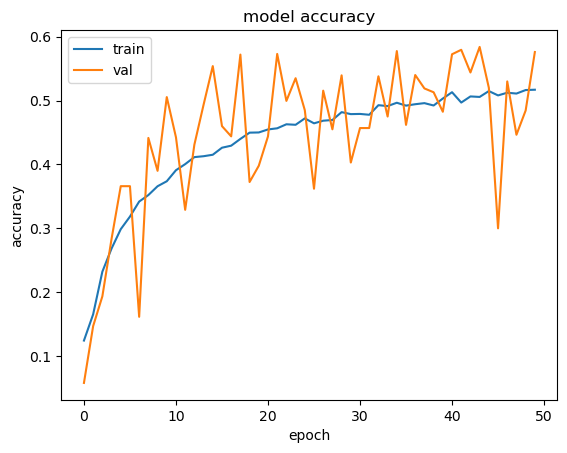

In [149]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

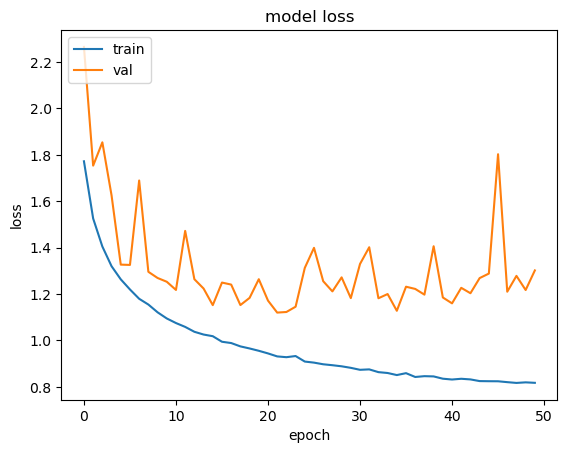

In [150]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
model = tf.keras.models.load_model('C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\200552_Assignment2\\Best_Models\\bestest_model.35-1.13.hdf5', compile = True, options = None)

In [24]:
path = 'C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\test\\X'
os.chdir(path)
X_final_list = os.listdir()
print(len(X_final_list))

2500


In [25]:
X_final_test = []
for i in range(len(X_final_list)):
  X_mat = np.load(X_final_list[i])
  a, b, c = X_mat.shape
  X_mat = librosa.power_to_db(X_mat, ref = np.max)
  X_mat = X_mat.reshape((b, c, 1))
  X_final_test.append(X_mat)
  X_final_test[i] = tf.convert_to_tensor(X_final_test[i])
print(len(X_final_test))

2500


In [26]:
X_final_test = tf.convert_to_tensor(X_final_test)

In [27]:
print(len(X_final_test), type(X_final_test))

2500 <class 'tensorflow.python.framework.ops.EagerTensor'>


In [37]:
Y_pred = model.predict(X_final_test)

79/79 [==============================] - 6s 72ms/step


In [38]:
path = 'C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\200552_Assignment2'
os.chdir(path)
DF = pd.DataFrame(Y_pred)
DF.to_csv("Assignment2_cnndata_before_threshold")

In [39]:
threshold_val = 0.162475
Y_pred[Y_pred < threshold_val] = 0
Y_pred[Y_pred >= threshold_val] = 1
Y_pred = np.array(Y_pred)

In [40]:
path = 'C:\\Users\\Manan Kabra\\Desktop\\Sem5\\EE603A\\200552_Assignment2'
os.chdir(path)
DF = pd.DataFrame(Y_pred)
DF.to_csv("Assignment2_cnndata_after_threshold")

In [ ]:
Y_test[Y_test >= 0.1] = 1

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

NameError: name 'Y_test' is not defined

In [28]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y_test, Y_pred)

array([[[1594,   14],
        [  46,  346]],

       [[1532,   32],
        [  61,  375]],

       [[1712,   14],
        [  35,  239]],

       [[1477,   79],
        [ 152,  292]],

       [[1678,   16],
        [  73,  233]],

       [[1750,   29],
        [  31,  190]],

       [[1855,   15],
        [  19,  111]],

       [[1826,   31],
        [  49,   94]],

       [[ 175,  579],
        [   5, 1241]],

       [[1823,   26],
        [  56,   95]]], dtype=int64)

In [23]:
correct = 0
total = 0
for i in range(len(Y_pred)):
  for j in range(len(Y_pred[i])):
    if(Y_test[i][j] == 1):
      total += 1   
      if(Y_pred[i][j] == 1):
        correct += 1
accuracy = correct/total
print(accuracy)

0.8592038471814053


In [24]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(Y_pred)):
  for j in range(len(Y_pred[i])):
    if(Y_test[i][j] == 1 and Y_pred[i][j] == 1):
      TP += 1
    elif(Y_test[i][j] == 0 and Y_pred[i][j] == 1):
      FP += 1
    elif(Y_test[i][j] == 1 and Y_pred[i][j] == 0):
      FN += 1
    elif(Y_test[i][j] == 0 and Y_pred[i][j] == 0):
      TN += 1
print(TP, FP, FN, TN)

3216 835 527 15422


In [25]:
precision = TP/(TP + FP)
recall = TP/(TP + FN)
f1_score = (2*(precision)*(recall))/(precision + recall)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 score = ", f1_score)

Precision =  0.7938780548012836
Recall =  0.8592038471814053
F1 score =  0.8252501924557352
